In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import scipy as sp
import seaborn as sns
from scipy import signal

# Drinking Statistics

In [2]:
ema = pd.read_csv("/Users/djpassey/Data/Muri/SHINE_EMA_Round1_19May2020.csv", parse_dates=True)
ema['Notification.Time'] = pd.to_datetime(ema['Notification.Time'])
ema['Num_Alcohol'] = ema.Num_Beer + ema.Num_Wine + ema.Num_Liquor

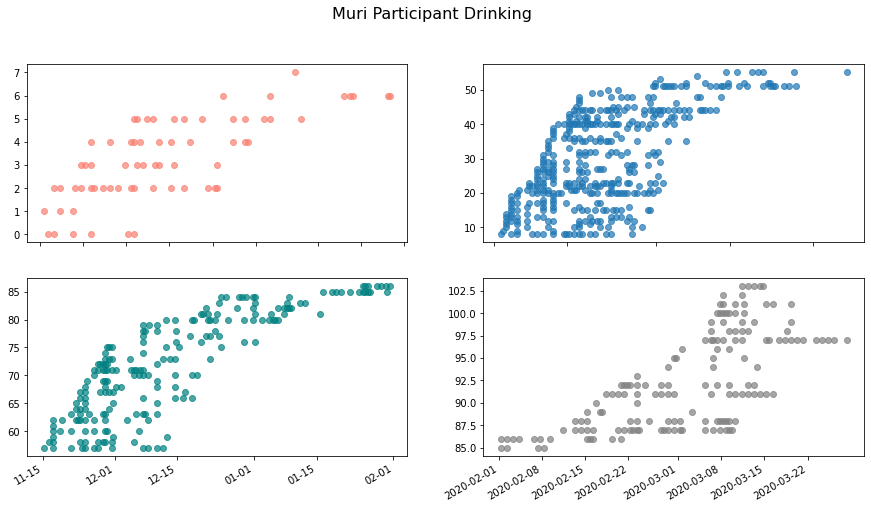

In [3]:
plt.rcParams["figure.figsize"] = [15, 8]

drinks = ema[ema.HadAlcohol == 1]
unique_ids = drinks.sort_values("Notification.Time")["ID"].unique()
idmapping = {unique_ids[i]:i for i in range(len(unique_ids))}

start_date = drinks["Notification.Time"].min()
end_date = drinks["Notification.Time"].max()
assert np.all(drinks["Notification.Time"] >= start_date)
assert np.all(drinks["Notification.Time"] <= end_date)

cohort1_end = "2019-05-01"
cohort2_start = "2019-05-01"
cohort2_end = "2019-08-01"
cohort3_start = "2019-10-01"
cohort3_end = "2020-02-01"
cohort4_start = "2020-02-01"
cohort4_end = end_date

pid = drinks.ID
times = drinks["Notification.Time"]

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%M-%d'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))

plt.subplot(2, 2, 1)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%M-%d'))
mask = (times > start_date) & (times < cohort1_end)
ids = [idmapping[id] for id in pid[mask]]
plt.scatter(times[mask], ids, c="salmon", alpha=0.7)
# plt.ylabel("Participant ID")
plt.tick_params(labelbottom=True)

plt.subplot(2, 2, 2)
mask = (times >= cohort2_start) & (times < cohort2_end)
ids = [idmapping[id] for id in pid[mask]]
plt.scatter(times[mask], ids, alpha=0.7)
plt.tick_params(labelbottom=True)


plt.subplot(2, 2, 3)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
mask = (times >= cohort3_start) & (times < cohort3_end)
ids = [idmapping[id] for id in pid[mask]]
plt.scatter(times[mask], ids, c="teal", alpha=0.7)

# plt.ylabel("Participant ID")
# plt.xlabel("Drink Time")

plt.subplot(2, 2, 4)
mask = (times >= cohort4_start) & (times < cohort4_end)
ids = [idmapping[id] for id in pid[mask]]
plt.scatter(times[mask], ids, c="gray", alpha=0.7)
# plt.xlabel("Drink Time")


plt.suptitle("Muri Participant Drinking", fontsize=16)
plt.gcf().autofmt_xdate()
#plt.tight_layout()

In [4]:
ema

,SHINEID,ID,Notification.Time,Session.Name,Notification.No,LifePak.Download.No,Responded,Completed.Session,Session.Instance,Session.Instance.Response.Lapse,...,Soc_EmoSit_Other,Soc_EmoSit_OtherPeople,Soc_EmoSit_StudyGroup,Soc_EmoSit_Travel,Soc_EmoSit_WorkSchool,GROUP.ID,Condition,Start.Date,Lifepak,Num_Alcohol
0,muri012,50925,2019-02-02 08:00:00,FirstMorning,1.0,1.0,1,1,1.0,3:41:36,...,NaN,NaN,NaN,NaN,NaN,g02m012,mindful,2/2/19,Shine Study B,NaN
1,muri012,50925,2019-02-02 14:00:00,PROMPTB1,1.0,1.0,1,1,1.0,0:00:03,...,NaN,NaN,NaN,NaN,NaN,g02m012,mindful,2/2/19,Shine Study B,NaN
2,muri012,50925,2019-02-02 18:00:00,Evening,1.0,1.0,1,1,1.0,0:35:25,...,NaN,NaN,NaN,NaN,NaN,g02m012,mindful,2/2/19,Shine Study B,NaN
3,muri012,50925,2019-02-02 21:00:00,PROMPTB1,2.0,1.0,1,1,2.0,14:52:18,...,NaN,NaN,NaN,NaN,NaN,g02m012,mindful,2/2/19,Shine Study B,NaN
4,muri012,50925,2019-02-03 08:00:00,Morning,1.0,1.0,1,1,1.0,3:50:52,...,NaN,NaN,NaN,NaN,NaN,g02m012,mindful,2/2/19,Shine Study B,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12312,muric438,60383,2019-12-16 08:00:00,Morning,27.0,1.0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,g6c,control,11/19/19,SHINEStudy_AAA(7),NaN
12313,muric438,60383,2019-12-16 14:00:00,PROMPTA,55.0,1.0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,g6c,control,11/19/19,SHINEStudy_AAA(7),NaN
12314,muric438,60383,2019-12-16 18:00:00,Evening,28.0,1.0,1,1,25.0,3:28:17,...,NaN,NaN,NaN,NaN,NaN,g6c,control,11/19/19,SHINEStudy_AAA(7),NaN
12315,muric438,60383,2019-12-16 21:00:00,PROMPTA,56.0,1.0,1,1,46.0,0:28:11,...,NaN,NaN,NaN,NaN,NaN,g6c,control,11/19/19,SHINEStudy_AAA(7),NaN


In [5]:
MORNING = ['FirstMorning', 'Morning'] 
EVENING = ['Evening']

def drink_sessions(df, prompt=None):
    if prompt is None:
        ds = df[df["Session.Name"].isin(MORNING+EVENING)]
    if prompt is "morning":
        ds = df[df["Session.Name"].isin(MORNING)]
    if prompt is "evening":
        ds = df[df["Session.Name"].isin(EVENING)]    
    ds.fillna({"Num_Alcohol":0, "HadAlcohol":0})
    return ds

def drink_train(idnum, df, prompt=None):
    drink_notif = df[df.ID == idnum]
    # WARNING: Fills signals with zeros if they didn't respond
    drink_notif = drink_sessions(drink_notif, prompt=prompt)
    drink_notif.sort_values("Notification.Time", inplace=True)
    times = drink_notif["Notification.Time"]
    ndrinks = drink_notif["Num_Alcohol"].fillna(0)
    return times, ndrinks.values 

def autocorr(y):
    """ Autocorrelation of a signal. Algorithm taken from:
        https://www.itl.nist.gov/div898/handbook/eda/section3/eda331.htm
    """
    mu = np.mean(y)
    N = len(y)
    auto = np.zeros(N)
    for h in range(N):
        auto[h] = np.sum((y[:N - h] - mu) * (y[h:] - mu)) / N
    var = np.sum((y - mu)**2)/N
    return auto/var

def fourier_transform(t, y):
    """ Take the fourier transform of a signal, rescale and provide a frequency array
        for easy plotting
    """
    total_time = float(t[-1] - t[0])
    N = len(y)
    xf = np.arange(N)/ (total_time)
    yf = sp.fft.fft(y) / N
    # Take half of the dfft and multiply by 2 because it is a mirror image
    yf = 2*np.abs(yf[:N//2])
    xf = xf[:N//2]
    return xf, yf

def nans_to_lines(y):
    """ This function fills in nans in time series data by find valid points
    that bookend a given series of nans, then replacing the nans with a line between the two points. 
    It also trims leading/trailing nans.
    """
    m = len(y)
    clean_y = np.zeros(m)
    nani = 0
    a = 0
    b = 0
    found_nan = False
    # Count initial nans
    initnan = 0
    if np.isnan(y[0]):
        while np.isnan(y[initnan]):
            initnan += 1
    for i in range(initnan, m):
        if np.isnan(y[i]) and not found_nan:
            a = y[i-1]
            nani = i
            found_nan = True
        if ~np.isnan(y[i]) and found_nan:
            b = y[i]
            clean_y[i] = b
            clean_y[nani:i] = np.linspace(a, b, i - nani + 2)[1:-1]
            found_nan = False
        else:
            clean_y[i] = y[i]
    return clean_y[initnan:nani] # Remove training nans

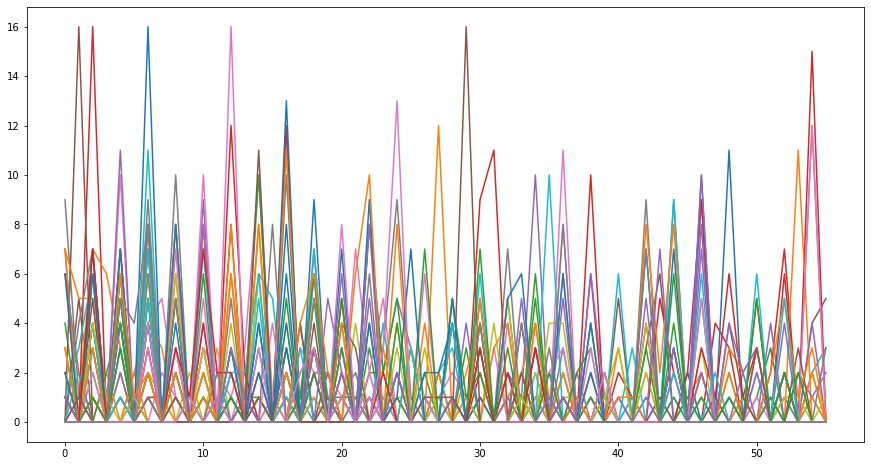

In [6]:
allprompts = tuple()
for idnum in ema.ID.unique():
    t, d = drink_train(idnum, ema)
    if np.max(d) < 30:
        plt.plot(d)
    allprompts += (d,)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


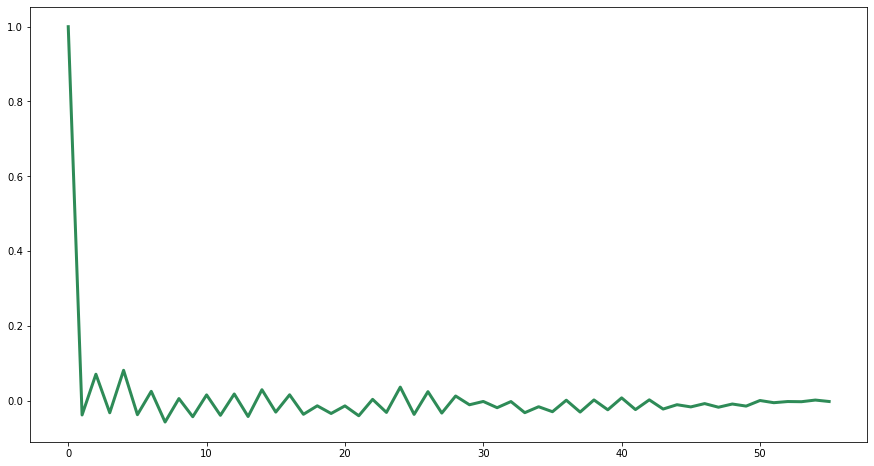

In [7]:
all_auto = np.array([autocorr(d) for d in allprompts])
keeprow, _ = np.where(~np.isnan(all_auto))
mu_all_auto = np.mean(all_auto[keeprow,:], axis=0)
plt.plot(mu_all_auto, c="seagreen", lw=3)

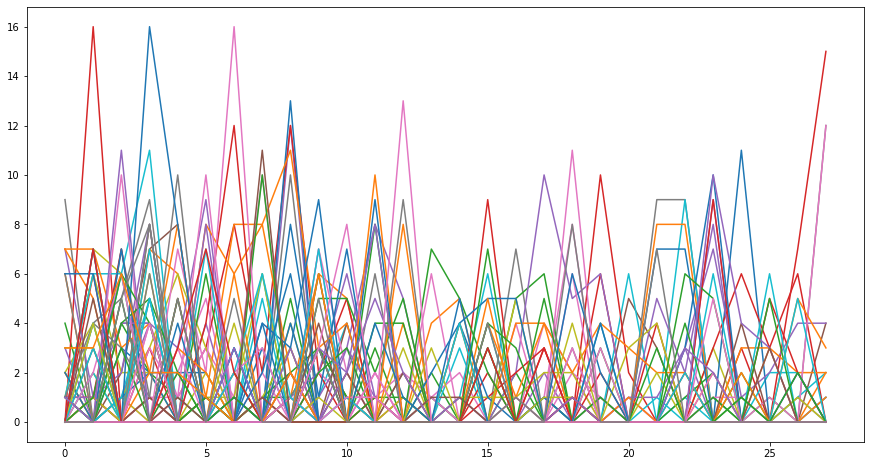

In [8]:
Morn = tuple()
Mids = []
for idnum in ema.ID.unique():
    t, d = drink_train(idnum, ema, prompt="morning")
    if np.max(d) < 30:
        plt.plot(d)
    Morn += (d,)
    Mids.append(idnum)

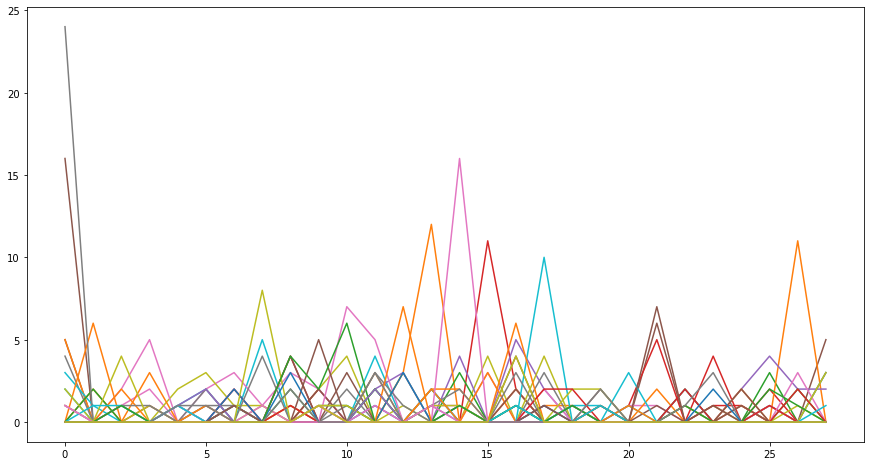

In [9]:
Eve = tuple()
Eids = []
for idnum in ema.ID.unique():
    t, d = drink_train(idnum, ema, prompt="evening")
    if np.max(d) < 30:
        plt.plot(d)
    Eve += (d,)
    Eids.append(idnum)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


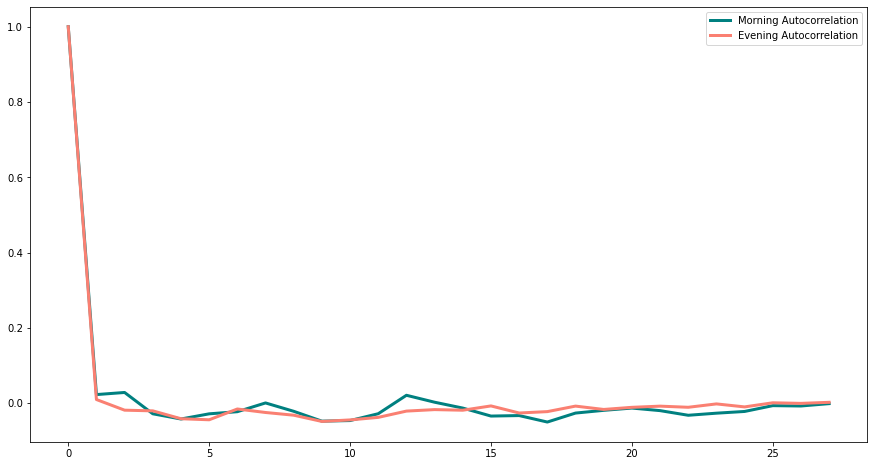

In [10]:
Mauto = np.array([autocorr(d) for d in Morn])
keeprow, _ = np.where(~np.isnan(Mauto))
mu_Mauto = np.mean(Mauto[keeprow,:], axis=0)
plt.plot(mu_Mauto, c="teal", lw=3, label="Morning Autocorrelation")

Eauto = np.array([autocorr(d) for d in Eve])
keeprow, _ = np.where(~np.isnan(Eauto))
mu_Eauto = np.mean(Eauto[keeprow,:], axis=0)
plt.plot(mu_Eauto, c="salmon", lw=3, label="Evening Autocorrelation")
plt.legend()

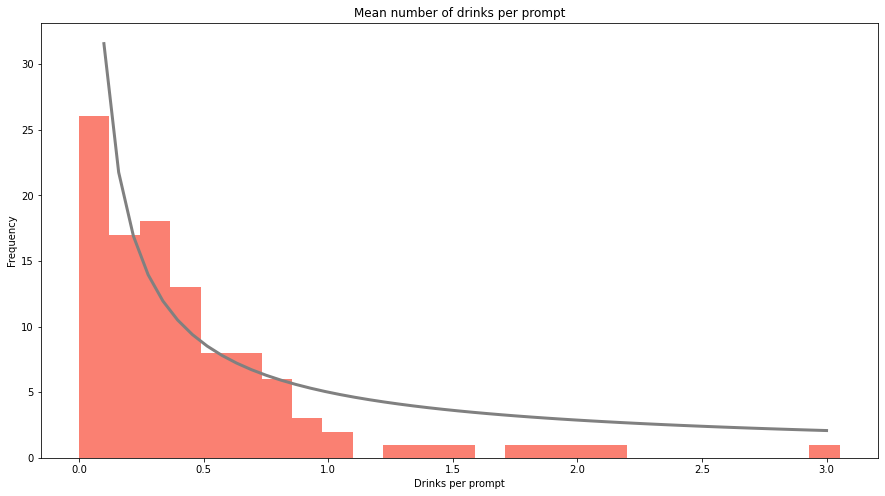

In [11]:
D = np.vstack(allprompts)
plt.hist(D.mean(axis=1), color="salmon", bins=25)
x = np.linspace(.1, 3)
plt.plot(x, 5/x**.8, c="gray", lw=3)
plt.title("Mean number of drinks per prompt")
plt.xlabel("Drinks per prompt")
plt.ylabel("Frequency")
plt.show()

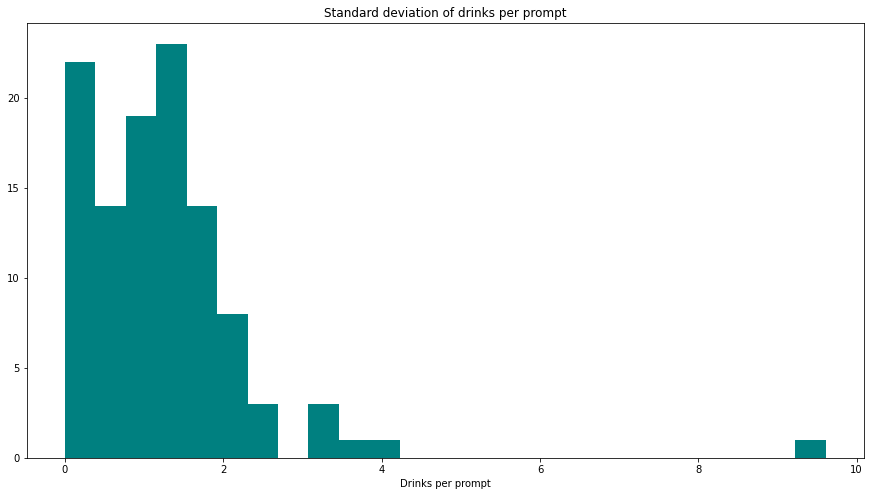

In [12]:
plt.hist(D.std(axis=1), color="teal", bins=25)
plt.title("Standard dev of drinks per prompt")
plt.title("Standard deviation of drinks per prompt")
plt.xlabel("Drinks per prompt")
plt.show()

## Fourier Transform

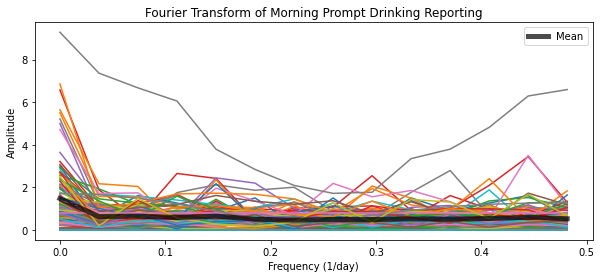

In [13]:
plt.rcParams["figure.figsize"] = [10,4]
Yf = tuple()
for m in Morn:
    x = np.arange(28)
    xf, yf = fourier_transform(x, m)
    Yf += (yf,)
    plt.plot(xf, yf)
    
Mf = np.vstack(Yf).T
mu_Mf = np.mean(Mf, axis=1)
plt.plot(xf, mu_Mf, lw=5, alpha=.7, c="k", label="Mean")
plt.legend()
plt.title("Fourier Transform of Morning Prompt Drinking Reporting")
plt.ylabel("Amplitude")
plt.xlabel("Frequency (1/day)")
plt.show()

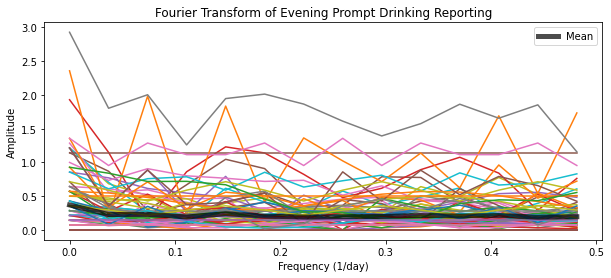

In [14]:
plt.rcParams["figure.figsize"] = [10,4]
Yf = tuple()
for m in Eve:
    x = np.arange(28)
    xf, yf = fourier_transform(x, m)
    Yf += (yf,)
    plt.plot(xf, yf)
    
Ef = np.vstack(Yf).T
mu_Ef = np.mean(Ef, axis=1)
plt.plot(xf, mu_Ef, lw=5, alpha=.7, c="k", label="Mean")
plt.legend()
plt.title("Fourier Transform of Evening Prompt Drinking Reporting")
plt.ylabel("Amplitude")
plt.xlabel("Frequency (1/day)")
plt.show()

These two plots show that the population drinks at all frequencies, that is, there is no frequency that stands out across the population. We could call this signal white, because it behaves the same as white noise, or random data. I'm honestly shocked.

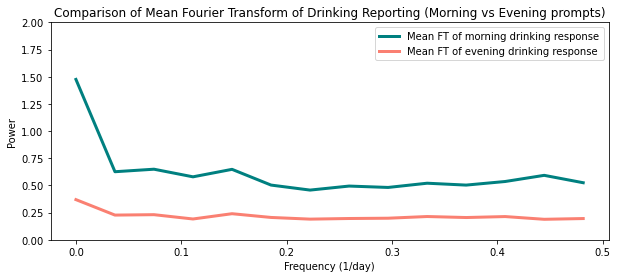

In [15]:
plt.plot(xf, mu_Mf, c="teal", lw=3, label="Mean FT of morning drinking response")
plt.plot(xf, mu_Ef, c="salmon", lw=3, label="Mean FT of evening drinking response")
plt.title("Comparison of Mean Fourier Transform of Drinking Reporting (Morning vs Evening prompts)")
plt.ylabel("Power")
plt.xlabel("Frequency (1/day)")
plt.ylim(0,2)
plt.legend()
plt.show()

## Frequency Boxplots
Same data as before but with boxplots to look at the distribution of frequencies in the population. Data looks pretty white. No frequency appears more often that others except for the frequency 0.0 which doesn't count.

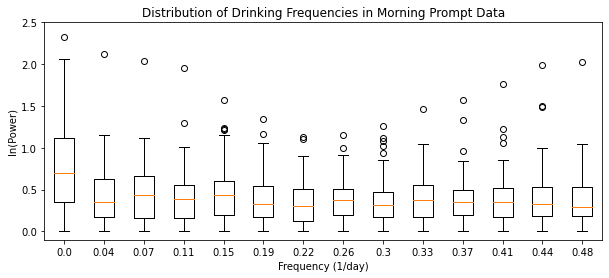

In [16]:
plt.boxplot(np.log(Mf.T + 1))
plt.xticks(np.arange(1,15), np.round(xf,2))
plt.title("Distribution of Drinking Frequencies in Morning Prompt Data")
plt.ylabel("ln(Power)")
plt.ylim(-.1, 2.50)
plt.xlabel("Frequency (1/day)")
plt.show()

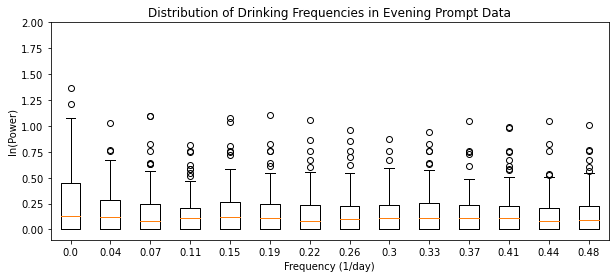

In [17]:
plt.boxplot(np.log(Ef.T + 1))
plt.xticks(np.arange(1,15), np.round(xf,2))
plt.title("Distribution of Drinking Frequencies in Evening Prompt Data")
plt.ylabel("ln(Power)")
plt.xlabel("Frequency (1/day)")
plt.ylim(-.1, 2)

plt.show()

## Cross Correlation of Mood and Drinking

In [18]:
moods = []
id_to_morn_mood = dict()
morn = drink_sessions(ema, prompt="morning")
for pid in pd.unique(morn.ID):
    m = morn.PositiveMood[(morn.ID == pid)]
    m = m.fillna(np.mean(m)).values
    moods.append(m)
    id_to_morn_mood[pid] = m

In [19]:
median_d = np.median(np.mean(Morn, axis=1))
cross_corr_ids = []
cross_corr = tuple()
for idnum, dr in zip(Mids, Morn):
    morn_mood = id_to_morn_mood[idnum]
    if len(morn_mood) == len(dr):
        cc = signal.correlate(morn_mood, dr)
        cc /= np.max(cc)
        cross_corr += (cc,)
        cross_corr_ids.append(idnum)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


In [20]:
len(cross_corr)

109

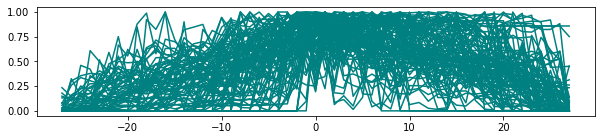

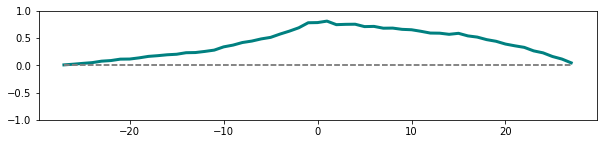

In [21]:
plt.rcParams["figure.figsize"] = [10, 2]
nanfree_cc = tuple(c for c in cross_corr if ~np.any(np.isnan(c)))
CC = np.vstack(nanfree_cc).T
lags = np.arange(-27, 28)
for cc in cross_corr:
    plt.plot(lags, cc, c="teal")
plt.show()
plt.plot(lags, np.mean(CC, axis=1), lw=3, c="teal", label="mean")
plt.plot(lags, np.zeros_like(lags), "--", c="gray")
plt.plot(lags, np.zeros_like(lags), "--", c="gray")

plt.ylim(-1,1)
plt.show()

## Cross Correlation of Drinking and Drinking (Autocorrelation)

In [24]:
median_d = np.median(np.mean(Morn, axis=1))
cross_corr_ids = []
cross_corr = tuple()
for idnum, dr in zip(Mids, Morn):
    morn_mood = id_to_morn_mood[idnum]
    if len(morn_mood) == len(dr):
        cc = signal.correlate(dr, dr)
        cc /= np.max(cc)
        cross_corr += (cc,)
        cross_corr_ids.append(idnum)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


In [25]:
len(cross_corr)

109

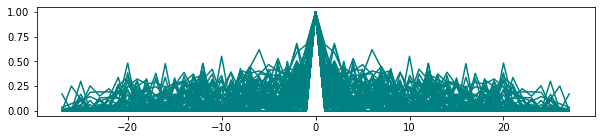

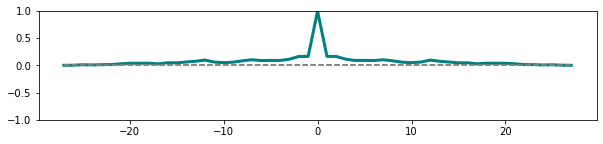

In [26]:
plt.rcParams["figure.figsize"] = [10, 2]
nanfree_cc = tuple(c for c in cross_corr if ~np.any(np.isnan(c)))
CC = np.vstack(nanfree_cc).T
lags = np.arange(-27, 28)
for cc in cross_corr:
    plt.plot(lags, cc, c="teal")
plt.show()
plt.plot(lags, np.mean(CC, axis=1), lw=3, c="teal", label="mean")
plt.plot(lags, np.zeros_like(lags), "--", c="gray")
plt.plot(lags, np.zeros_like(lags), "--", c="gray")

plt.ylim(-1,1)
plt.show()

## Cross Correlation of Mood and Mood (Autocorrelation)

In [27]:
median_d = np.median(np.mean(Morn, axis=1))
cross_corr_ids = []
cross_corr = tuple()
for idnum, dr in zip(Mids, Morn):
    morn_mood = id_to_morn_mood[idnum]
    if len(morn_mood) == len(dr):
        cc = signal.correlate(morn_mood, morn_mood)
        cc /= np.max(cc)
        cross_corr += (cc,)
        cross_corr_ids.append(idnum)

In [28]:
len(cross_corr)

109

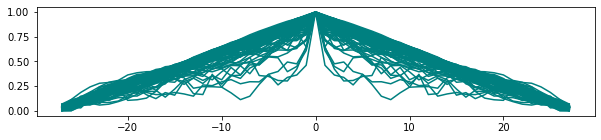

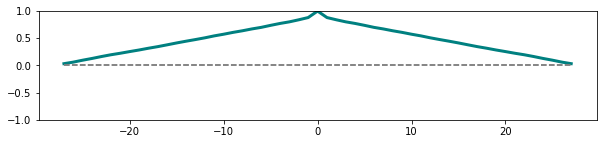

In [29]:
plt.rcParams["figure.figsize"] = [10, 2]
nanfree_cc = tuple(c for c in cross_corr if ~np.any(np.isnan(c)))
CC = np.vstack(nanfree_cc).T
lags = np.arange(-27, 28)
for cc in cross_corr:
    plt.plot(lags, cc, c="teal")
plt.show()
plt.plot(lags, np.mean(CC, axis=1), lw=3, c="teal", label="mean")
plt.plot(lags, np.zeros_like(lags), "--", c="gray")
plt.plot(lags, np.zeros_like(lags), "--", c="gray")

plt.ylim(-1,1)
plt.show()

In [337]:
T = len(Morn[1])
R = np.zeros((T,T))
MM = np.zeros(T)
DD = np.zeros(T)
median_d = np.median(np.mean(Morn, axis=1))
cross_corr_ids = []
for idnum, dr in zip(Mids, Morn):
    morn_mood = id_to_morn_mood[idnum]
    morn_mood -= np.mean(morn_mood)
    dr -= np.mean(dr)
    if (len(morn_mood) == len(dr)) and (len(dr) == T) and (np.mean(dr) != 0):
        R += np.outer(morn_mood, dr)
        MM += morn_mood**2
        DD += dr**2
        cross_corr_ids.append(idnum)
        
R/= np.outer(MM**.5, DD**.5)


In [338]:
np.random.rand(2,2) * np.array([[0.01], [10]])

array([[0.00643503, 0.00765824],
       [0.42773999, 5.90673802]])

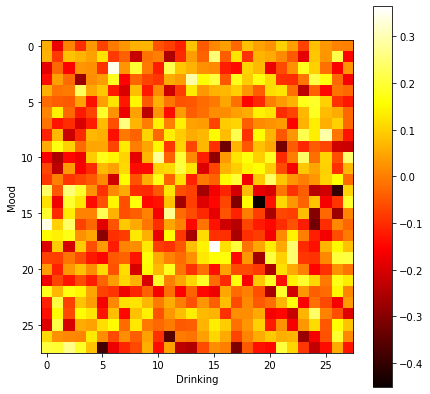

In [339]:
plt.rcParams["figure.figsize"] = [7,7]
plt.imshow(R, cmap="hot")
plt.colorbar()
plt.ylabel("Mood")
plt.xlabel("Drinking")
plt.show()

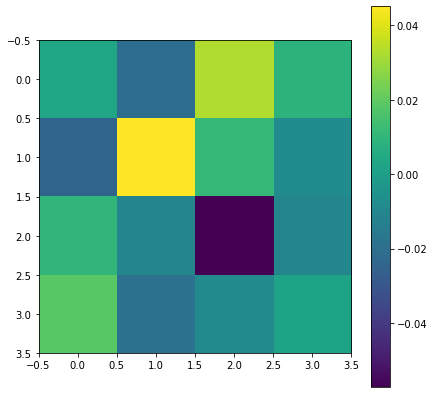

In [347]:
blocksize=7
q = int(R.shape[0] / blocksize)
B = np.zeros((q,q))
for i in range(q):
    for j in range(q):
        B[i,j] = np.mean(R[i*blocksize:(i+1)*blocksize, j*blocksize:(j+1)*blocksize,])
        
plt.imshow(B)
plt.colorbar()
plt.show()

In [328]:
T = len(Morn[1])
R = np.zeros((T,T))
median_d = np.median(np.mean(Morn, axis=1))
cross_corr_ids = []
for idnum, dr in zip(Mids, Morn):
    morn_mood = id_to_morn_mood[idnum]
    morn_mood -= np.mean(morn_mood)
    dr -= np.mean(dr)
    mstd = np.std(morn_mood)
    dstd = np.std(dr)
    if (len(morn_mood) == len(dr)) and (len(dr) == T) and (np.mean(dr) != 0):
        R += np.outer(dr, dr) / (dstd * dstd)
        cross_corr_ids.append(idnum)

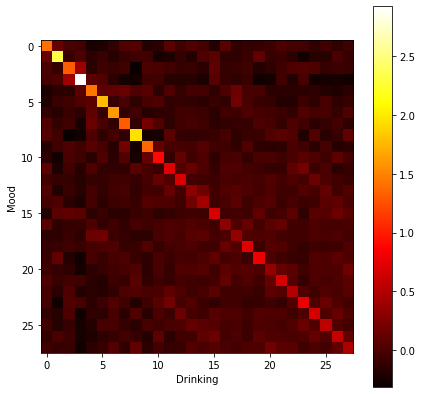

In [329]:
plt.rcParams["figure.figsize"] = [7,7]
plt.imshow(R/len(cross_corr_ids), cmap="hot")
plt.colorbar()
plt.ylabel("Drinking")
plt.xlabel("Drinking")
plt.show()

In [330]:
T = len(Morn[1])
R = np.zeros((T,T))
median_d = np.median(np.mean(Morn, axis=1))
cross_corr_ids = []
for idnum, dr in zip(Mids, Morn):
    morn_mood = id_to_morn_mood[idnum]
    morn_mood -= np.mean(morn_mood)
    dr -= np.mean(dr)
    mstd = np.std(morn_mood)
    dstd = np.std(dr)
    if (len(morn_mood) == len(dr)) and (len(dr) == T) and (np.mean(dr) != 0):
        R += np.outer(morn_mood, morn_mood) / (mstd * mstd)
        cross_corr_ids.append(idnum)

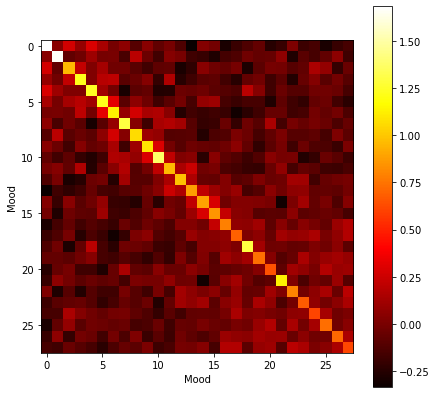

In [331]:
plt.rcParams["figure.figsize"] = [7,7]
plt.imshow(R/len(cross_corr_ids), cmap="hot")
plt.colorbar()
plt.ylabel("Mood")
plt.xlabel("Mood")
plt.show()